<h1>Уровень 2</h1> 

<h1>1. Предобработка</h1> 

<h3>Открываем корпус</h3> 

In [ ]:
!wget https://raw.githubusercontent.com/helenusya/compling/main/harry-potter.txt

In [6]:
file_path = 'harry-potter.txt'
with open(file_path, 'r') as file: 
    hp_content = file.read()
    
hp_content[:100]

"\nHarry Potter and the Sorcerer's Stone \n \n \nCHAPTER ONE \n \nTHE BOY WHO LIVED \n \nMr. and Mrs. Dursley"

<h3>Чистим текст</h3> 

In [7]:
import re

def clean_text(hp):
    text = hp.lower() 
    text = re.sub(r'[^a-z\s]', '', text) 
    text = re.sub(r'\s+', ' ', text).strip() 
    return text
cleaned_hp = clean_text(hp_content)

cleaned_hp[:100]

'harry potter and the sorcerers stone chapter one the boy who lived mr and mrs dursley of number four'

<h3>Токенизируем корпус</h3>

In [8]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
tokens_hp = word_tokenize(cleaned_hp) #токенизация по словам

tokens_hp[:10]

[nltk_data] Downloading package punkt to /Users/helen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['harry',
 'potter',
 'and',
 'the',
 'sorcerers',
 'stone',
 'chapter',
 'one',
 'the',
 'boy']

In [38]:
len(tokens_hp) #кол-во слов после токенизации

1084075

<h3>Удаляем стоп-слова</h3> 

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
filtered_hp_tokens = [word for word in tokens_hp if word.lower() not in stop_words]

print("Токены без стоп-слов:", filtered_hp_tokens[:50])

[nltk_data] Downloading package stopwords to /Users/helen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Токены без стоп-слов: ['harry', 'potter', 'sorcerers', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', 'youd', 'expect', 'involved', 'anything', 'strange', 'mysterious', 'didnt', 'hold', 'nonsense', 'mr', 'dursley', 'director', 'firm', 'called', 'grunnings', 'made', 'drills', 'big', 'beefy', 'man', 'hardly', 'neck', 'although', 'large', 'mustache', 'mrs', 'dursley']


In [10]:
len(filtered_hp_tokens) #кол-во слов в корпусе после чистки

588075

<h1>2. Обучение и поиск сходств Word2Vec</h1> 

<h3>Обучение</h3> 

In [11]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=[filtered_hp_tokens], vector_size=100, window=5, min_count=1, workers=4)

/Users/helen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<h3>Ищем похожее</h3> 

In [12]:
model.wv.most_similar(["boy"])

[('dudley', 0.5906423926353455),
 ('vernon', 0.589601457118988),
 ('aunt', 0.5783301591873169),
 ('hagrid', 0.5707481503486633),
 ('hed', 0.5565683841705322),
 ('made', 0.5529312491416931),
 ('petunia', 0.5344283580780029),
 ('uncle', 0.5343253016471863),
 ('harry', 0.5245795249938965),
 ('still', 0.5219115614891052)]

In [13]:
model.wv.most_similar(["harry"])

[('hagrid', 0.8556053042411804),
 ('dudley', 0.8393589854240417),
 ('uncle', 0.7943820357322693),
 ('vernon', 0.7870103120803833),
 ('one', 0.7852519154548645),
 ('yeh', 0.7702403664588928),
 ('didnt', 0.7471270561218262),
 ('petunia', 0.7425126433372498),
 ('aunt', 0.7305089235305786),
 ('mr', 0.7217004895210266)]

In [14]:
model.wv.most_similar(["ron"])

[('macmillan', 0.3764644265174866),
 ('exauror', 0.3666265904903412),
 ('bile', 0.35519924759864807),
 ('whassamatter', 0.3529665768146515),
 ('urg', 0.3345831036567688),
 ('mountains', 0.33246079087257385),
 ('mens', 0.32625073194503784),
 ('listing', 0.32256874442100525),
 ('entries', 0.32203593850135803),
 ('want', 0.31939002871513367)]

In [15]:
model.wv.most_similar(["hermione"])

[('revisiting', 0.4092555642127991),
 ('autobiography', 0.3797079622745514),
 ('accomplished', 0.36629387736320496),
 ('beliefmalfoy', 0.35656821727752686),
 ('betweentimes', 0.33896687626838684),
 ('proceed', 0.3384031057357788),
 ('cheated', 0.3351730406284332),
 ('trawled', 0.3338865339756012),
 ('boneless', 0.3276631534099579),
 ('yesand', 0.32694026827812195)]

In [16]:
model.wv.most_similar(["gryffindor"])

[('scrupulously', 0.38615429401397705),
 ('selfsame', 0.373300701379776),
 ('passin', 0.3542798161506653),
 ('rift', 0.3447246849536896),
 ('blackberries', 0.33914417028427124),
 ('fawkes', 0.3380577266216278),
 ('balustrade', 0.33737117052078247),
 ('nosebleed', 0.33555689454078674),
 ('cut', 0.3314865529537201),
 ('heap', 0.32776695489883423)]

In [17]:
model.wv.most_similar(["slytherin"])

[('haunt', 0.39263683557510376),
 ('stretching', 0.37875601649284363),
 ('wrongfoot', 0.3670279085636139),
 ('dunderhead', 0.36695173382759094),
 ('glade', 0.3651750683784485),
 ('sail', 0.3584314286708832),
 ('thirtieth', 0.35657799243927),
 ('reconstructions', 0.3533407151699066),
 ('nightmare', 0.352595716714859),
 ('eccentricities', 0.3435317575931549)]

<h3>Считаем сходство</h3> 

In [18]:
model.wv.similarity('boy','magic')

0.39261347

In [31]:
model.wv.similarity('harry','voldemort')

0.3083551

In [33]:
model.wv.similarity('harry','dumbledore')

0.5421697

Получается, что Гарри ближе к Дамблдору, чем к Волан-де-Морту

In [19]:
model.wv.similarity('voldemort','kill')

0.0135003505

In [20]:
model.wv.similarity('dumbledore','smile')

0.11221216

In [21]:
model.wv.similarity('boy','wizard')

0.19491442

In [22]:
model.wv.similarity('dumbledore','wizard')

0.4175283

In [23]:
model.wv.similarity('invisibility', 'cloak') #мантия-невидимка

0.15797329

In [24]:
model.wv.doesnt_match(['boy', 'wizard', 'chair'])

'chair'

In [25]:
model.wv.doesnt_match(['cloak', 'wand', 'girl'])

'girl'

<h3>Визуализируем</h3> 

In [26]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

In [27]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  vectors_2d = PCA().fit_transform(word_vectors) 
  plt.figure(figsize=(10,10)) 
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='g') 
  for i, word in enumerate(words): 
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

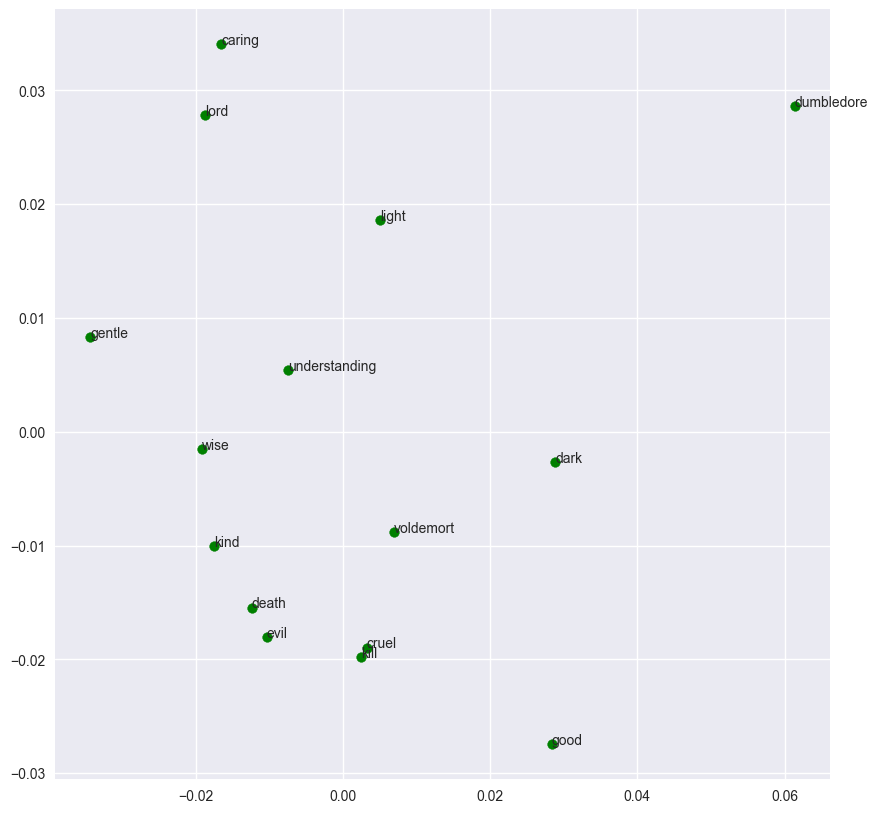

In [35]:
pca_scatterplot(model, ['lord', 'voldemort', 'evil', 'cruel', 'dark', 'kill', 'death',
'dumbledore', 'wise', 'gentle', 'kind', 'caring', 'understanding', 'light', 'good'])

Гипотеза состояла в том, что прилагательные со значением "тёмный/злой/проч." будут ближе к имени Волан-де-Морта, а противоположные — к имени Дамблдора, однако по какой-то причине это не сработало. Была предпринята попытка сделать то же самое с глаголами ("убил, напугал, проч." VS "помог, защитил, провёл"), однако и это не дало ожидаемых результатов. При этом было проведено более детальное рассмотрение текста вручную, и, как показалось, слова вроде "kill" действительно чаще стояли в контексте с именем злодея, а слова вроде "help" — с именем доброго волшебника. Ниже приведены все слова, с которыми я пробовала поработать.

Было выдвинуто предположение о том, что после лемматизации исход может получиться более положительным.

*'boy', 'lord', 'voldemort', 'evil', 'kind', 'cruel', 'dark', 'light', 'kill', 'death', 'dumbledore' 'muggles', 'muggle', 'magic', 'magical', 'ordinary', 'wizard', 'dumbledore', 'boy'*

*'boy', 'harry', 'dumbledore', 'voldemort'*

*'hermione', 'mudblood', 'ginger', 'ron', 'boy'*

*'lord', 'voldemort', 'evil', 'cruel', 'dark', 'kill', 'death',
'wise', 'gentle', 'kind', 'caring', 'understanding', 'light', 'good'*

*'angry', 'dark', 'arrogant', 'ambitious', 'sanctimonious', 'selfish', 
'evil', 'merciless', 'ruthless', 'greedy', 'ignorant', 'callous', 'brutal', 'obsessive', 'paranoid'*

*'wizard', 'magic', 'magical'*
*'killed', 'scared', 'finish', 'loyal', 'brave', 'smart'*
*'killed', 'kill', 'scared', 'finished'*

*'smile', 'protect', 'guide', 'help', 
'eternal', 'powerful', 'weak', 'strong', 'powerless', 'dark', 'white'*

<h1>То же самое, но с лемматизацией</h1> 

<h3>Лемматизируем</h3> 

In [36]:
import spacy
#загружаем модель Spacy для английского языка
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 5894686

#образец текста
hp = cleaned_hp

#обработка текста (создаем объект spacy)
doc = nlp(hp)

#извлечение лемм
lemmatized_hp = [token.lemma_ for token in doc]

print("Наш текст:", hp[:50])
print("Леммы:", lemmatized_hp[:50])

Наш текст: harry potter and the sorcerers stone chapter one t
Леммы: ['harry', 'potter', 'and', 'the', 'sorcerer', 'stone', 'chapter', 'one', 'the', 'boy', 'who', 'live', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'be', 'proud', 'to', 'say', 'that', 'they', 'be', 'perfectly', 'normal', 'thank', 'you', 'very', 'much', 'they', 'be', 'the', 'last', 'people', 'you', 'd', 'expect', 'to', 'be', 'involve', 'in', 'anything', 'strange', 'or', 'mysterious']


<h3>Удаляем стоп-слова</h3> 

In [37]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
filtered_hp_lemms_dva = [word for word in lemmatized_hp if word.lower() not in stop_words]

print("Леммы без стоп-слов:", filtered_hp_lemms_dva[:50])

[nltk_data] Downloading package stopwords to /Users/helen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Леммы без стоп-слов: ['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'live', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', 'expect', 'involve', 'anything', 'strange', 'mysterious', 'hold', 'nonsense', 'mr', 'dursley', 'director', 'firm', 'call', 'grunning', 'make', 'drill', 'big', 'beefy', 'man', 'hardly', 'neck', 'although', 'large', 'mustache', 'mrs', 'dursley', 'thin', 'blonde']


<h1>Обучение и поиск сходств Word2Vec</h1> 

<h3>Обучение</h3> 

In [38]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=[filtered_hp_lemms_dva], vector_size=100, window=5, min_count=1, workers=4)

<h3>Считаем сходство</h3> 

После лемматизации почти все показатели возросли, что выглядит достаточно правдоподобно.

In [39]:
model.wv.similarity('boy','magic')

0.8657971

In [40]:
model.wv.similarity('voldemort','kill')

0.3555818

In [112]:
model.wv.similarity('dumbledore','smile')

0.6721782

In [114]:
model.wv.similarity('boy','wizard')

0.88624203

In [115]:
model.wv.similarity('dumbledore','wizard')

0.86579716

In [117]:
model.wv.doesnt_match(['boy', 'wizard', 'chair'])

'chair'

In [118]:
model.wv.doesnt_match(['cloak', 'wand', 'girl'])

'cloak'

Здесь по какой-то причине происходит сбой, не выводится ожидаемый результат (слово  "girl" по логике должно быть лишним, но машина считает иначе).

<h3>Визуализируем</h3> 

In [41]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

In [42]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  vectors_2d = PCA().fit_transform(word_vectors) 
  plt.figure(figsize=(10,10)) 
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='g') 
  for i, word in enumerate(words): 
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

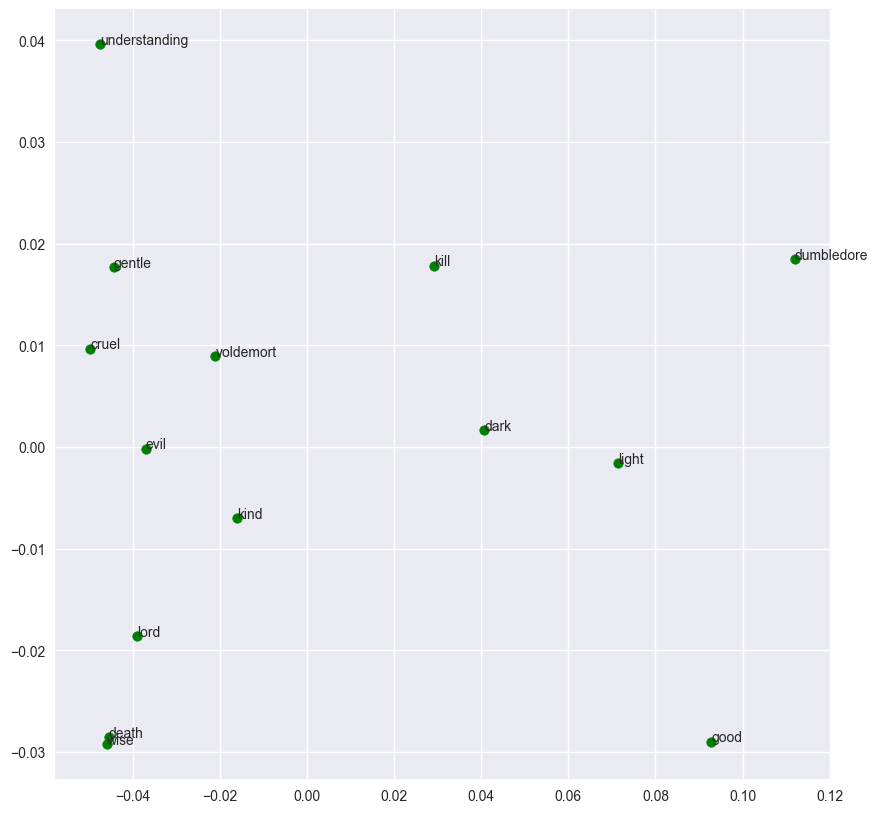

In [44]:
pca_scatterplot(model, ['lord', 'voldemort', 'evil', 'cruel', 'dark', 'kill', 'death',
'dumbledore', 'wise', 'gentle', 'kind', 'understanding', 'light', 'good'])

К сожалению, после лемматизации гипотеза тоже не подтвердилась (с выбранными выше и другими словами из списка). Возможно, проблема состояла в самой гипотезе или в подобранных словах. С другой стороны, может быть и такое, что код работает не очень совершенно.

Однако при этом подсчёт сходств без визуализации выглядит очень хорошо.